In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_jeux video.csv to Dataset_jeux video (2).csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
df_original = pd.read_csv(io.BytesIO(uploaded['Dataset_jeux video.csv']), index_col=0, sep = ',')
df_original.head(8)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26;
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01;
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02;


#Exploration des données

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           16475 non-null  object 
 1   Platform       16475 non-null  object 
 2   Year           16206 non-null  float64
 3   Genre          16475 non-null  object 
 4   Publisher      16418 non-null  object 
 5   NA_Sales       16475 non-null  float64
 6   EU_Sales       16475 non-null  float64
 7   JP_Sales       16475 non-null  float64
 8   Other_Sales    16475 non-null  float64
 9   Global_Sales;  16475 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
df_original.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16206.000000,16475.000000,16475.000000,16475.000000,16475.000000
mean,2006.401888,0.265727,0.147338,0.078019,0.048280
std,5.841174,0.819518,0.507074,0.310177,0.189252
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


#Processing

In [ ]:
#Transformation de la colonne Global_Sales en type float
df_original['Global_Sales;'].astype(object)
df_original['Global_Sales'] = df_original['Global_Sales;'].str.split(';', n=2, expand=True)[0]
df_original.drop('Global_Sales;', axis=1, inplace=True)
df_original['Global_Sales'] = df_original['Global_Sales'].astype(float)

In [ ]:
#Supression des lignes contenant des NA (soit 304 lignes c'est à dire 0,01% du dataset)
df = df_original.dropna()

In [ ]:
#Tranformation de la colonne Year en type integer
df['Year'] = df['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16171 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16171 non-null  object 
 1   Platform      16171 non-null  object 
 2   Year          16171 non-null  int64  
 3   Genre         16171 non-null  object 
 4   Publisher     16171 non-null  object 
 5   NA_Sales      16171 non-null  float64
 6   EU_Sales      16171 non-null  float64
 7   JP_Sales      16171 non-null  float64
 8   Other_Sales   16171 non-null  float64
 9   Global_Sales  16171 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16171.000000,16171.000000,16171.000000,16171.000000,16171.000000,16171.000000
mean,2006.401583,0.266727,0.148426,0.079070,0.048643,0.543141
std,5.844957,0.825270,0.511028,0.312767,0.190748,1.572712
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#Nombre de lignes suprimmées
sup_row = len(df_original) - len(df)
sup_row

427

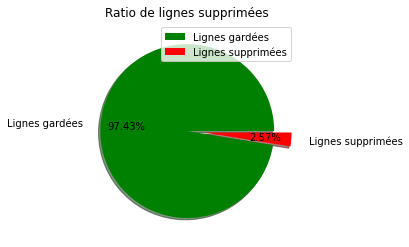

In [ ]:
plt.pie(x=[len(df),sup_row], labels = ['Lignes gardées','Lignes supprimées'],
        colors = ['g', 'r'],
        explode = [0,0.2],
        autopct = lambda x: str(round(x,2))+'%',
        pctdistance = 0.7, labeldistance = 1.2, shadow = True)
plt.title("Ratio de lignes supprimées")
plt.legend()
plt.savefig("Ratio de lignes supprimées.png")
plt.show();

In [ ]:
#Vérification des suppressions des valeurs manquantes
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#Data Visualisation

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091156,0.006330,-0.169271,0.041248,-0.074450
NA_Sales,-0.091156,1.000000,0.768963,0.451525,0.634473,0.941282
EU_Sales,0.006330,0.768963,1.000000,0.436795,0.726258,0.903322
JP_Sales,-0.169271,0.451525,0.436795,1.000000,0.290830,0.612956
Other_Sales,0.041248,0.634473,0.726258,0.290830,1.000000,0.747969
Global_Sales,-0.074450,0.941282,0.903322,0.612956,0.747969,1.000000


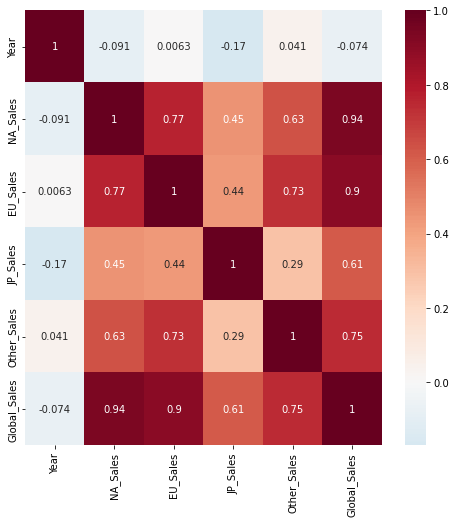

In [ ]:
#Heatmap afin de constater l'importantce des corrélations entre les différents revenus des territoires avec le revenu global 
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0)
display()
df.corr()

Commentaire : On constate une forte corrélation entre la variable NA_Sales et EU_Sale. Nous pouvons en déduire ce sont les ventes en Amérique du Nord et en Europe qui pèsent le plus dans le revenu global d'un jeu au niveau mondiale.
Ce sont effectivement les 2 plus gros marchés.

Text(0.5, 1.0, 'Ventes du Japon en fonction des ventes globales')

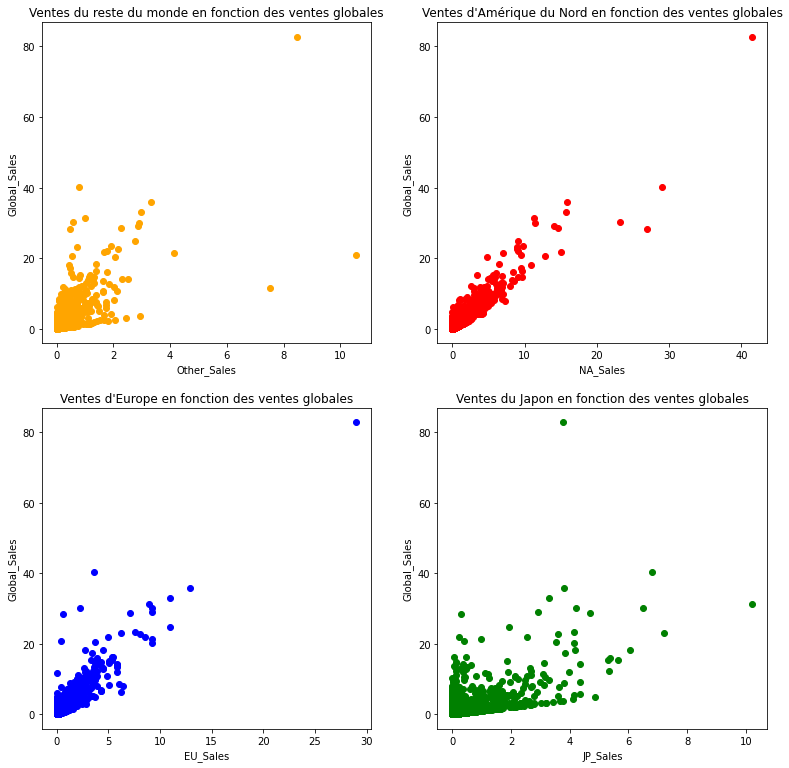

In [ ]:
#Nuage de point du revenu mondial des jeux en fonctions de leur revenu par territoire
fig = plt.figure(figsize=(13,13))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df['Other_Sales'], df['Global_Sales'], color='orange')
ax1.set_xlabel('Other_Sales')
ax1.set_ylabel('Global_Sales')
ax1.set_title('Ventes du reste du monde en fonction des ventes globales')

ax2.scatter(df['NA_Sales'], df['Global_Sales'], color='red')
ax2.set_xlabel('NA_Sales')
ax2.set_ylabel('Global_Sales')
ax2.set_title("Ventes d'Amérique du Nord en fonction des ventes globales")

ax3.scatter(df['EU_Sales'], df['Global_Sales'], color='blue')
ax3.set_xlabel('EU_Sales')
ax3.set_ylabel('Global_Sales')
ax3.set_title("Ventes d'Europe en fonction des ventes globales")

ax4.scatter(df['JP_Sales'], df['Global_Sales'], color='green')
ax4.set_xlabel('JP_Sales')
ax4.set_ylabel('Global_Sales')
ax4.set_title('Ventes du Japon en fonction des ventes globales')


Commentaire : L'objectif de ce graphique est de savoir si les jeux ayant eu un succès au niveau mondial, ont également eu du succès sur le territoire en abcisse. 
Plus les points laissent définir une courbe linéaire tel que sur NA_Sales plus il y une forte corrélation entre les ventes du territoires en question et les ventes globales.

Par exemple, nous pouvons constater sur le graphique du Japon une droite qui se dessine mais non lineaire. En effet, bien que des jeux ont eu du succès en terme de vente sur ce territoire, cela n'a pas été le cas au niveau mondial. On peut en déduire que cela s'explique en raison du nombre de consommateur limité comparé aux autres marchés.

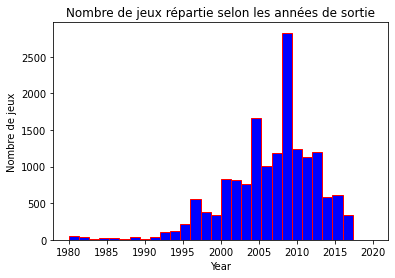

2008    1414
2009    1414
2010    1246
2007    1186
2011    1124
2006    1003
2005     922
2002     823
2003     768
2004     741
2012     654
2015     611
2014     579
2013     545
2001     478
1998     376
2000     347
2016     342
1999     338
1997     289
1996     263
1995     219
1994     120
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
#Histogramme mesurant le nombre de jeux répartie selon l'année de leur sortie.
import numpy as np
import scipy.stats as stats
plt.hist(df['Year'], bins=30, color='blue', edgecolor='red', label='hist')
kde = stats.kde.gaussian_kde(df['Year'])
x=np.linspace(0,80,100)
y=kde(x)
plt.xlabel('Year')
plt.ylabel('Nombre de jeux')
plt.title('Nombre de jeux répartie selon les années de sortie')
plt.show()
df['Year'].value_counts()

Commentaire : L'histogramme a pour objectif de visualiser la répartition du nombre de sortie des jeux entre 1980 et 2020. Nous remarquons instantanément les années records concernant le nombre de sortie à savoir 2008,2009.

Nous constatons une croissance forte de 10 ans entre 1995 et 2005, puis une baisse significative à partir de 2012.
La question que nous pouvons nous poser est : Existe-il une influence du nombre de jeu sortie sur l'évolution des ventes ?

<Figure size 1440x1440 with 0 Axes>

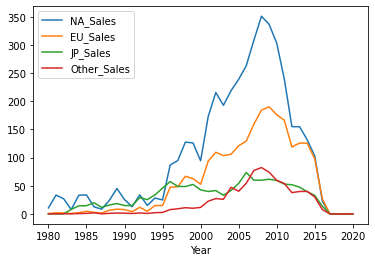

In [ ]:
#Evolution des revenus des jeux par territoire
df_by_year = df.groupby('Year').sum()
plt.figure(figsize=(20,20))
df_by_year.plot(y=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'])

Commentaire : 
A permière vue, nous voyons que les courbes suivent la même augmentation. Il existe une forte corrélation entre la croissance du nombre de sortie et les ventes.

On peut constater les éléments suivants : 
* Commencement des ventes majoritairement en Amérique du Nord et au Japon, début des ventes en Europe après 1985 et dans les autres pays 1995
* Explosion des ventes dans le monde entier à partir de 1995 et atteint un pic en 2008/2009 puis baisse jusqu'à 2020.
* Les plus gros consommateur de jeu sont les nord américains ensuite les européens puis le japon et enfin le reste du monde

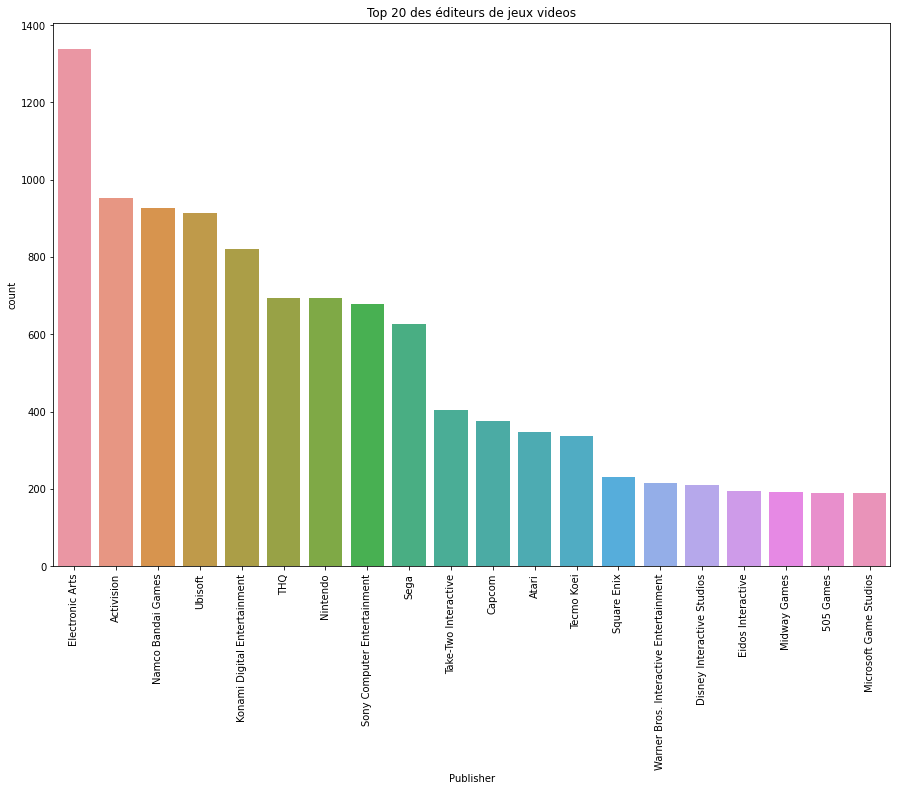

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Top 20 des éditeurs de jeux videos');

Commentaire : Electronics Arts est l'éditeur ayant sorti le plus de jeux (plus de 1000). Il est suivi de Activision, Namco Bandai Games.

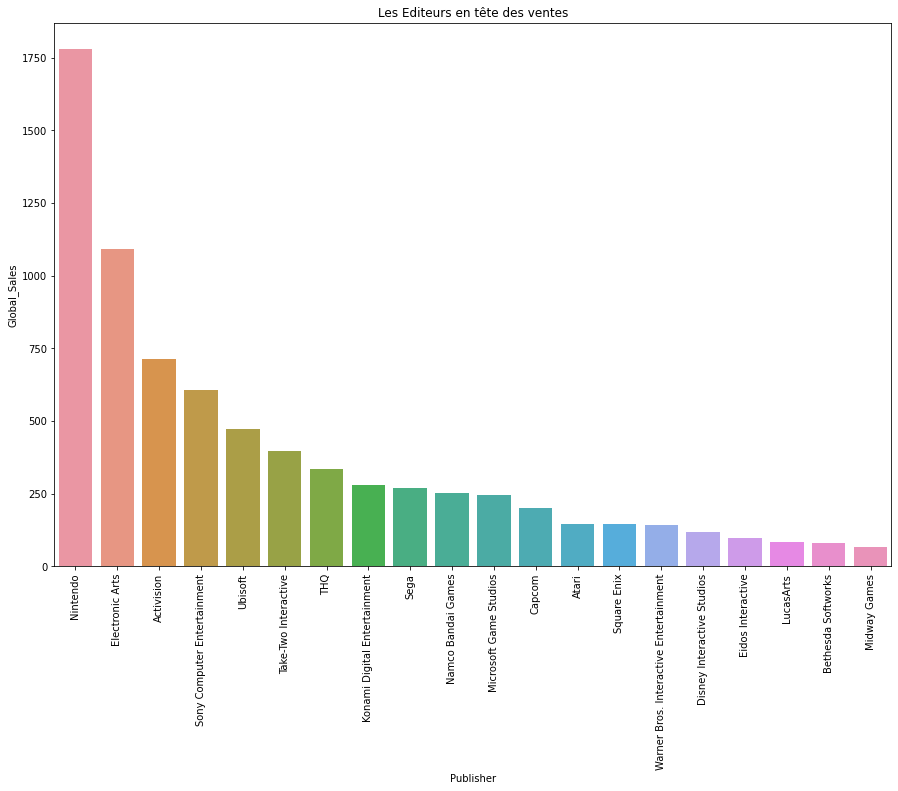

In [ ]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)
plt.title('Les Editeurs en tête des ventes');

Commentaire : L'éditeur ayant généré le plus de vente, s'agit de Nintendo loin devant les autres (plus de 1750 millions cumulés). En deuxième position, il s'agit d'Electronic Arts et d'Activision ce qui n'est pas étonnant puisque ce sont les 2 éditeurs sortant le plus de jeux.

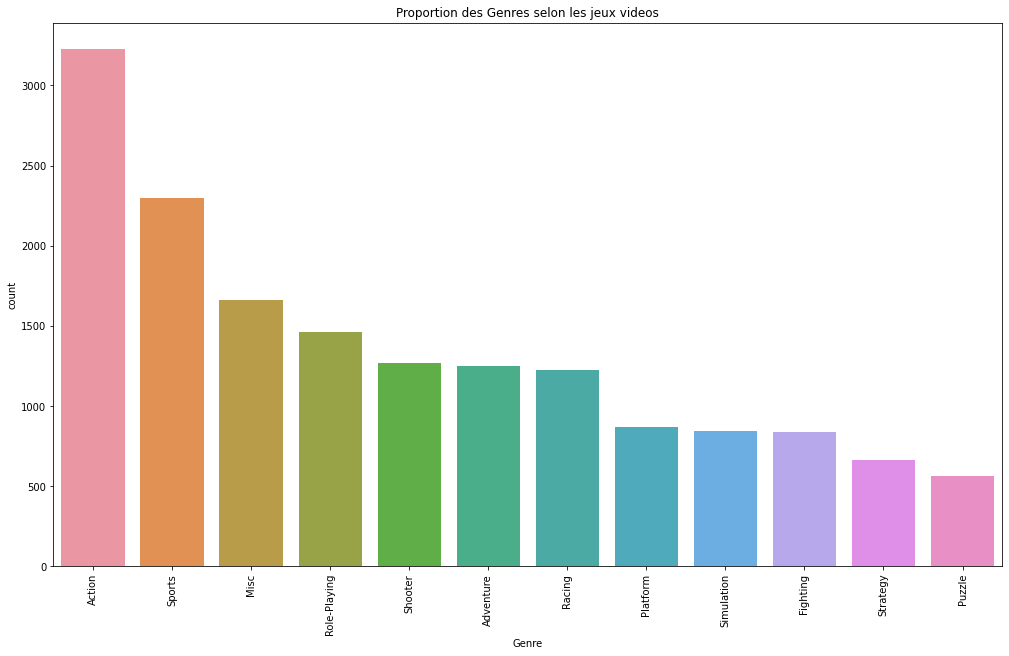

In [ ]:
plt.figure(figsize=(17, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Proportion des Genres selon les jeux videos');

Commentaire : Les jeux d'Action sont loin d'être les plus nombreux devant les jeux de sport, misc et les autres.

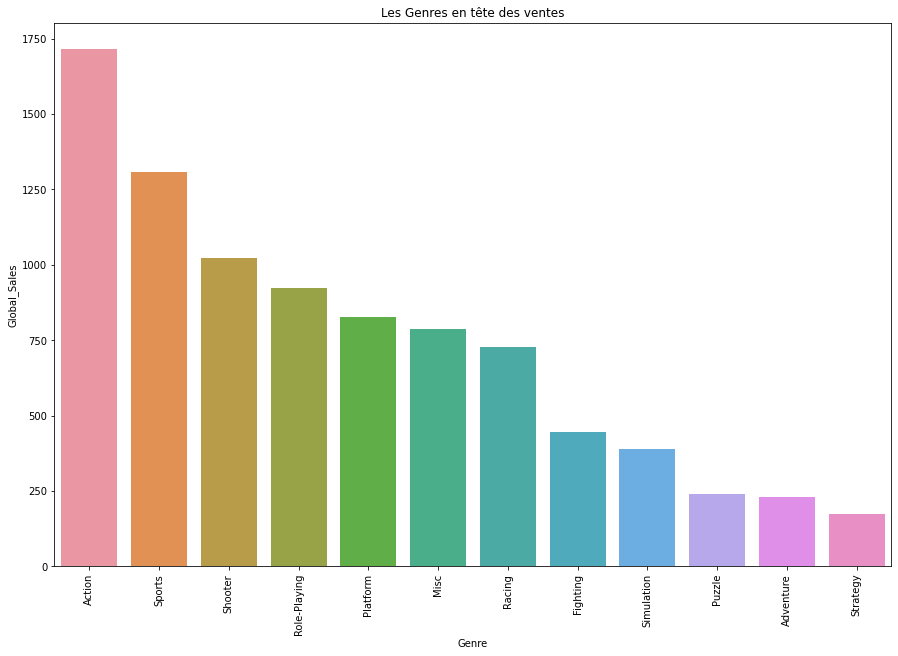

In [ ]:
data_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.title('Les Genres en tête des ventes');

Commentaire : Bien qu'on retrouve les jeux d'action et de sport qui sont en tête des jeux les plus vendus. Les jeux de tir et de rôle sont deux autres genres les plus vendus.

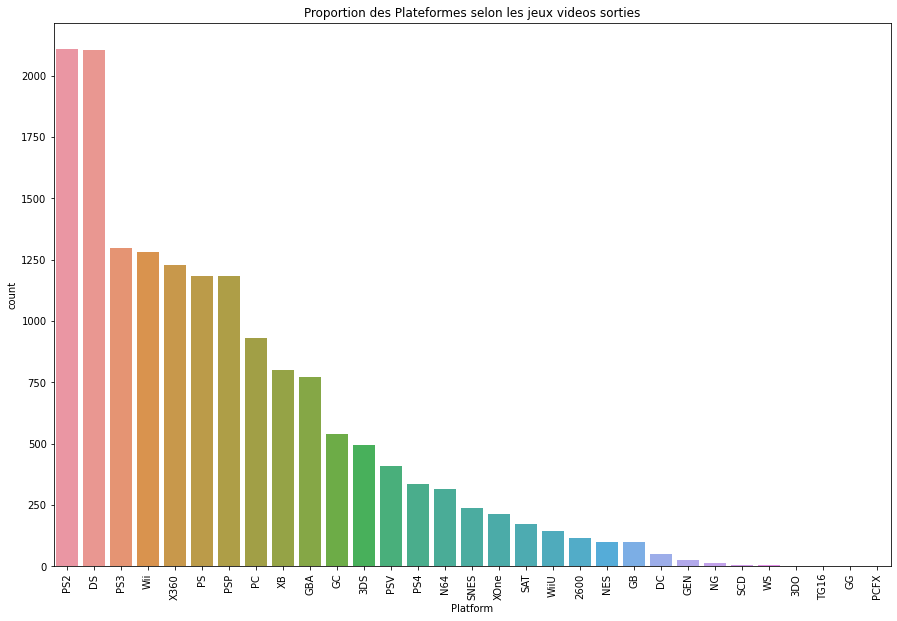

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Proportion des Plateformes selon les jeux videos sorties');

Commentaire : Les plateformes PS2 et DS sont les deux consoles sur lesquel les jeux sortent le plus. Bien au delà des consoles concurrentes directe à savoir PC, Wii et XBox.

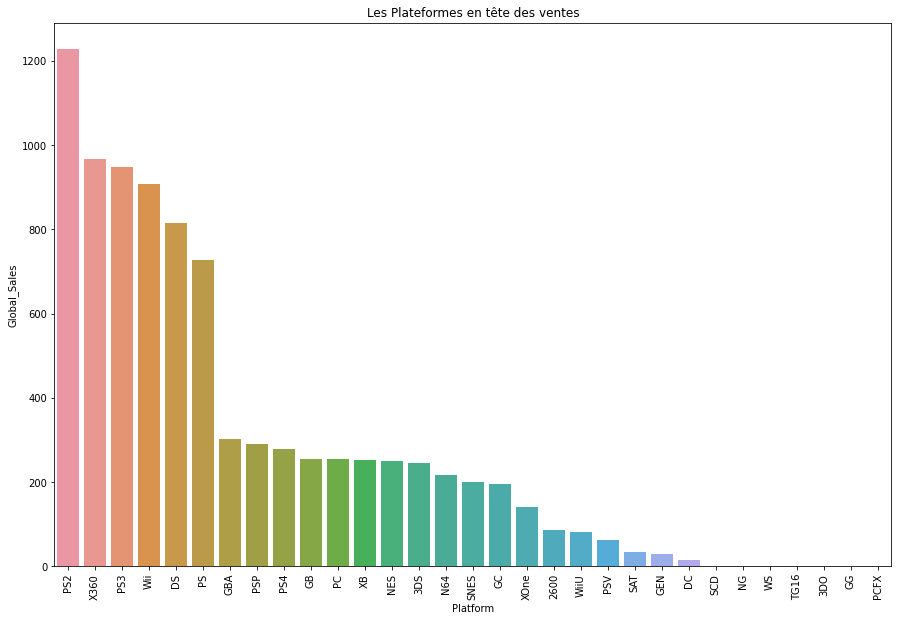

In [ ]:
data_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)
plt.title('Les Plateformes en tête des ventes');

Commentaire : Sans surprise, nous retrouvons la PS2 en tête des ventes, cependant il est précédé de la X360 et non de la DS.
Ainsi les playstation 1, 2, 3 comptabilise le 1/3 des ventes totales.

In [ ]:
import plotly.express as px
monplot = pd.DataFrame(df_original['Genre'].value_counts(normalize=True))
fig = px.pie(df_original,
    names='Genre',
    title="Jeux publiés par Genre",)

fig.update_traces(textposition = 'outside' , textinfo = 'percent+label')
fig.show()

Ce pie chart représente le pourcentage de jeux publiés par genre .
On y remarque que les jeux de sports et d'actions sont les plus publiés


*   20% de jeux d'action
*   14.2 de jeux de sports


*   Soit plus d'un tiers des jeux vidéo sont soit de sport ou soit d'action





In [ ]:
fig = px.pie(df_original,
    values='Global_Sales',
    names='Publisher',
    title="Publishers les plus lucratifs par Global_Sales")

fig.update_traces(hoverinfo='label+percent', textposition = 'inside' , textinfo = 'none', )
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide')
fig.show()

Celui la rerésente les 10 boites les plus lucratives :

*   Nintendo domine presque plus d'un quart de l'industrie
*   Electronic arts et Activision qui sont 2eme et 3eme respectivement ne le font pas.
*   Nintendo a 7 fois le CA de Bandai Namco





*   BARPLOT REPRESENTANT LES JEUX PUBLIES PAR CONSOLE :
*   la PS2 est en tete avec la Nintendo DS
*   corrélation avec la date peu probable , la PS4 est sortie apres la PS2 et la PS1 avant , ont eu moins de jeux .



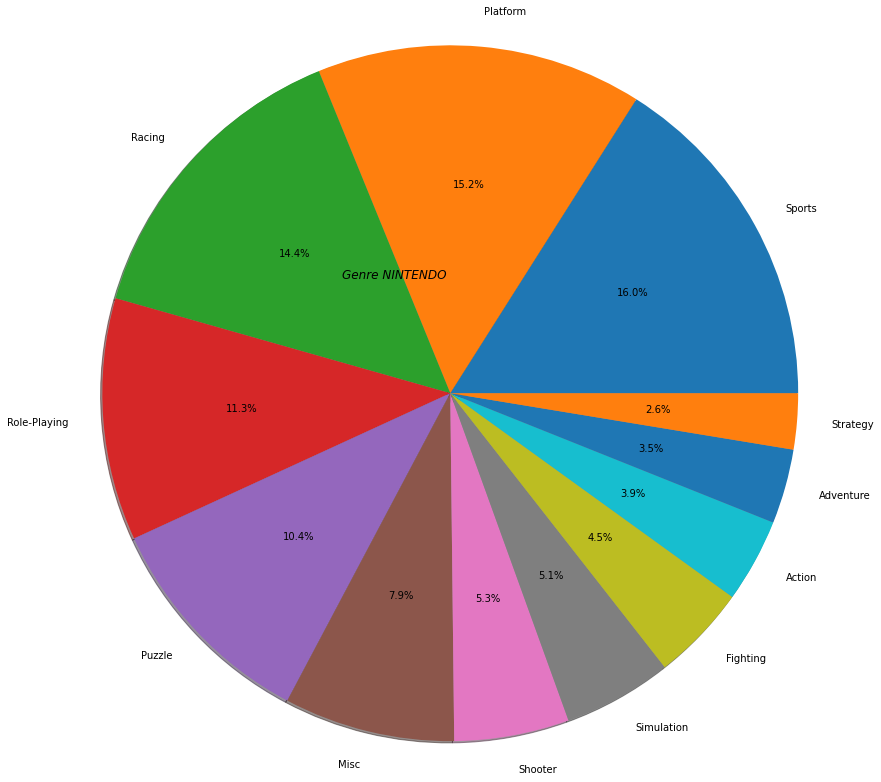

In [ ]:
nintendo_games = df.loc[df["Publisher"] == "Nintendo"]
EA_games = df.loc[df["Publisher"] == "Electronic Arts"]
activision_games = df.loc[df["Publisher"] == "Activision"]

nintendogenre = plt.pie(nintendo_games.Genre.value_counts(), 
            labels = nintendo_games.Genre.unique(), 
            autopct='%1.1f%%',
            shadow=True,
            radius = 4)
nintendogenre = plt.title(label="Genre NINTENDO",   
                    loc="left", 
                    fontstyle='italic')



LES JEUX PAR GENRE CHEZ NINTENDO :

*   principalement des jeux de sport , plateforme et sports
*   des genres assez variés


*   très peu de jeux d'actions 



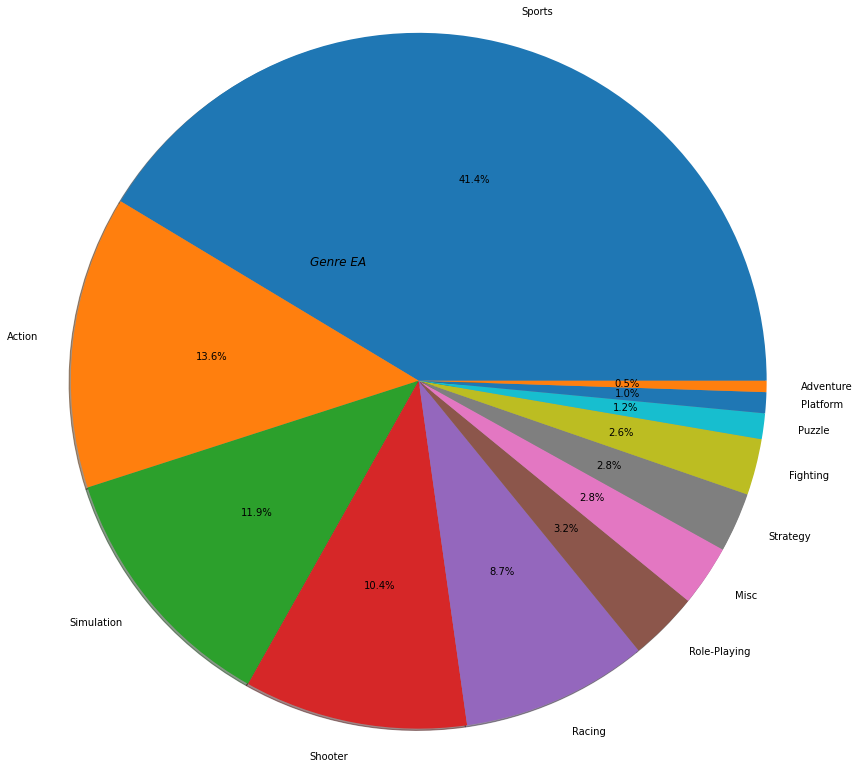

In [ ]:
# EA Games genres games
EAgenre = plt.pie(EA_games.Genre.value_counts(), 
            labels = EA_games.Genre.unique(), 
            autopct='%1.1f%%',
            shadow=True,
            radius = 4)
EAgenre = plt.title(label="Genre EA",   
                    loc="left", 
                    fontstyle='italic')




LES JEUX PAR GENRE CHEZ EA :

*   les jeux de sports dominent
*   les jeux d'action sont deuxième


*   repartition assez hétérogène

*   tres peu de jeux de palteforme comparé a Nintendo





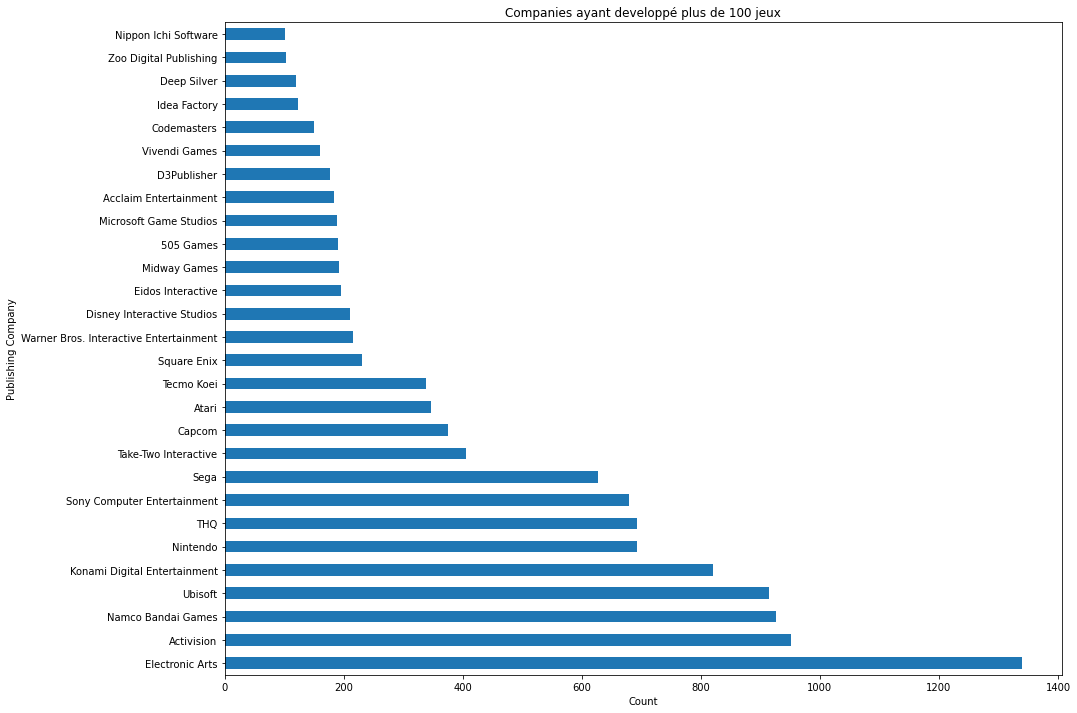

In [ ]:
plt.figure(figsize=(15,12))
publishers = df.Publisher.value_counts()
publishers = publishers[publishers.values > 100]
publishers.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Publishing Company')
plt.title('Companies ayant developpé plus de 100 jeux')
plt.show()

ENTREPRISES AYANT PUBLIE PLUS DE 100 JEUX :


*   EA Publie le plus de jeux 
*   Nintendo qui est la plus lucrative est 7eme 


*   Bandai Namco qui est la 10éme la plus lucrative est la troisieme a publier le plus de jeux 






#Visualisation du rapport

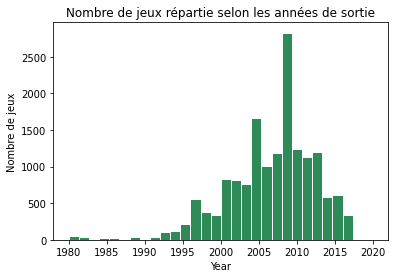

In [ ]:
#Histogramme mesurant le nombre de jeux répartie selon l'année de leur sortie.
import numpy as np
import scipy.stats as stats
plt.hist(df['Year'], bins=30, color='seagreen', edgecolor='white', label='hist')
kde = stats.kde.gaussian_kde(df['Year'])
x=np.linspace(0,80,100)
y=kde(x)
plt.xlabel('Year')
plt.ylabel('Nombre de jeux')
plt.title('Nombre de jeux répartie selon les années de sortie')
plt.savefig('ok.png')
plt.show()

In [ ]:
#Remplacement par le nom des plateformes
data = df.replace(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], 
       ['Wii', 'Nes', 'GB', 'DS', 'Xbox', 'Playstation', 'Playstation', 'snes', 'game-boy-advance',
        '3ds', 'Playstation', 'n64', 'Playstation', 'Xbox', 'PC', '2600', 'PSP', 'Xbox', 'gamecube',
        'Wii', 'gen', 'dreamcast', 'Playstation', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx'])
display(data)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,game-boy-advance,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,gamecube,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,Playstation,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,
1,Wii,41.49,29.02,3.77,8.46
2,Nes,29.08,3.58,6.81,0.77
3,Wii,15.85,12.88,3.79,3.31
4,Wii,15.75,11.01,3.28,2.96
5,GB,11.27,8.89,10.22,1.00


In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_platform2 = comp_platform.set_index('Platform')
console = comp_platform2.loc[['DS','PC','Wii','Xbox','Playstation']]
console = console.reset_index()
display(console)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,386.45,193.88,174.53,60.13
1,PC,91.83,136.65,0.17,24.23
2,Wii,534.15,288.28,81.07,85.49
3,Xbox,857.45,382.33,14.00,104.79
4,Playstation,1405.35,1023.44,391.23,422.68


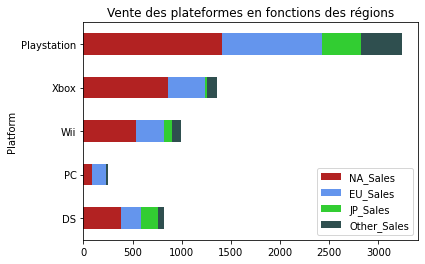

In [ ]:
from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt
console.plot(
    x = 'Platform',
    kind = 'barh',
    stacked = True,
    color = ['firebrick','cornflowerblue','limegreen','darkslategrey'],
    title = 'Vente des plateformes en fonctions des régions',
    mark_right = True)
plt.savefig("Platform.png")
plt.show()

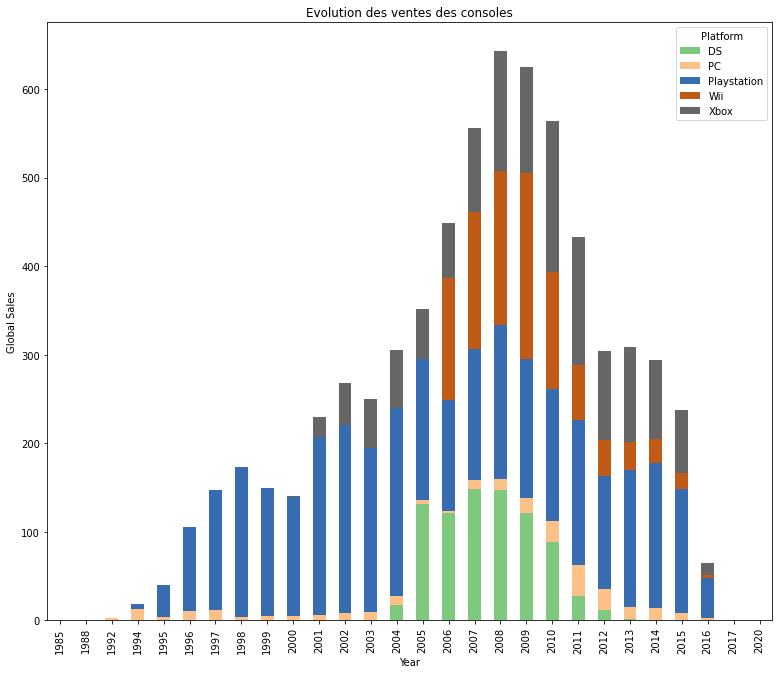

In [ ]:
date_console = data[(data['Platform'] == 'Wii') | (data['Platform'] == 'Playstation') | (data['Platform'] == 'Xbox')| (data['Platform'] == 'PC')| (data['Platform'] == 'DS')]
yearlySales = date_console.groupby(['Year','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Accent',  
                           grid=False,  figsize=(13,11))
plt.title('Evolution des ventes des consoles')
plt.ylabel('Global Sales')
plt.savefig("Platform_Year.png")
plt.show()

In [ ]:
comp_genres = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genres = comp_genres.groupby(by=['Genre']).sum().reset_index()

<Figure size 1296x1296 with 0 Axes>

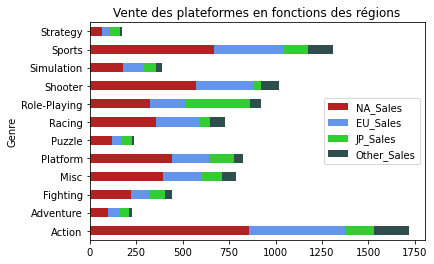

In [ ]:
plt.figure(figsize=(18,18))
comp_genres.plot(
    x = 'Genre',
    kind = 'barh',
    stacked = True,
    color = ['firebrick','cornflowerblue','limegreen','darkslategrey'],
    title = 'Vente des plateformes en fonctions des régions',
    mark_right = True)

plt.savefig("Genre.png")
plt.show()

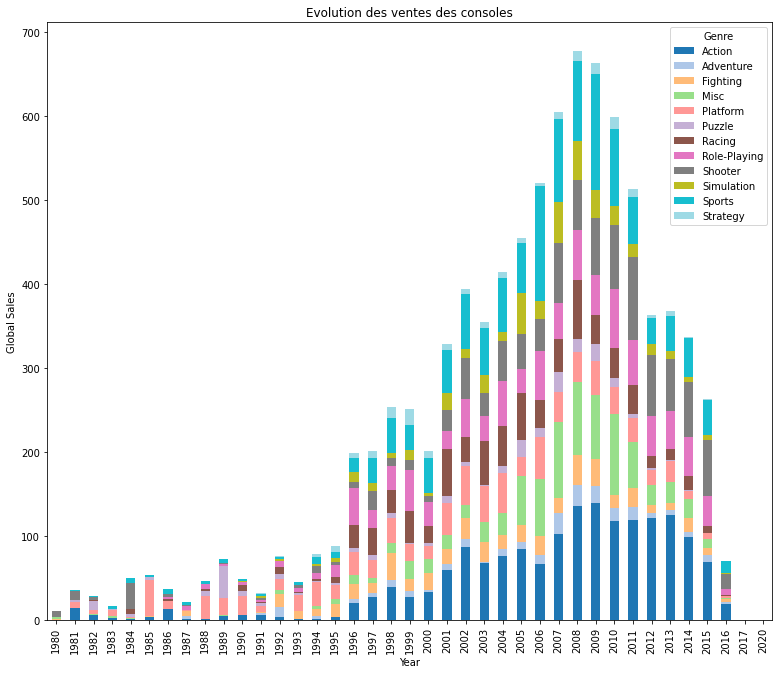

In [ ]:
yearlySales = data.groupby(['Year','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'tab20',  
                           grid=False,  figsize=(13,11))
plt.title('Evolution des ventes des consoles')
plt.ylabel('Global Sales')
plt.savefig("Genre_time.png")
plt.show()

In [ ]:
date_genre = data[(data['Genre'] == 'Action') | (data['Genre'] == 'Sport') | (data['Genre'] == 'Puzzle') | (data['Genre'] == 'Misc')
| (data['Genre'] == 'Shooter')| (data['Genre'] == 'Platform')| (data['Genre'] == 'Role-Playing')]

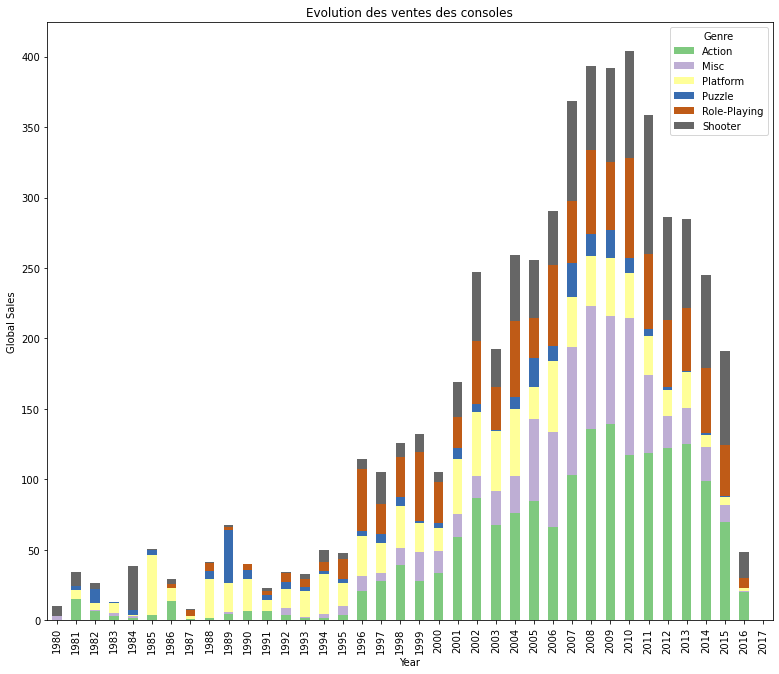

In [ ]:
yearlySales = date_genre.groupby(['Year','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Accent',  
                           grid=False,  figsize=(13,11))
plt.title('Evolution des ventes des consoles')
plt.ylabel('Global Sales')
plt.savefig("Genre_time2.png")
plt.show()

# Analyse statistique

In [ ]:
#Transformation des variables catégorielles en variables indicatrices
df_with_categorie = pd.get_dummies(df, columns = ['Platform', 'Genre', 'Publisher'])
df_with_categorie

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
Rank,,,,,,,,,,,,,,,,,,,,,
1,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,2002,0.01,0.00,0.00,0.00,0.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16597,Men in Black II: Alien Escape,2003,0.01,0.00,0.00,0.00,0.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16598,SCORE International Baja 1000: The Official Game,2008,0.00,0.00,0.00,0.00,0.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Aperçu des variables ayant le plus de corrélation avec la variable cible 'Global_Sales'
test = df_with_categorie.iloc[:,6:]
corre = test.corr()
corre.sort_values(by=['Global_Sales'], ascending=False)

,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN
Global_Sales,1.000000,0.010980,-0.004416,-0.005489,-0.008199,-0.038247,0.102730,-0.021829,-0.021233,0.013836,...,-0.011418,-0.009300,-0.005157,-0.005828,-0.002616,-0.002416,-0.002566,-0.003700,-0.002216,-0.003381
Publisher_Nintendo,0.272639,-0.017986,-0.002882,0.107565,-0.011784,0.053348,0.220818,0.081396,0.049279,-0.008491,...,-0.009568,-0.007063,-0.003721,-0.003721,-0.001664,-0.001664,-0.001664,-0.002353,-0.001664,-0.002353
Platform_GB,0.102730,-0.006603,-0.001058,-0.013819,-0.004326,-0.030051,1.000000,-0.017405,-0.014411,-0.003117,...,-0.003513,-0.002593,-0.001366,-0.001366,-0.000611,-0.000611,-0.000611,-0.000864,-0.000611,-0.000864
Platform_NES,0.100235,-0.006637,-0.001064,-0.013890,-0.004349,-0.030207,-0.006066,-0.017495,-0.014486,-0.003134,...,-0.003531,-0.002607,-0.001373,-0.001373,-0.000614,-0.000614,-0.000614,-0.000868,-0.000614,-0.000868
Genre_Platform,0.062203,0.009046,-0.003242,0.000648,-0.003366,-0.019465,0.045506,0.124246,0.064531,0.038413,...,-0.010763,-0.007945,-0.004186,-0.004186,-0.001872,-0.001872,-0.001872,-0.002647,-0.001872,-0.002647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platform_PSV,-0.040209,-0.013692,-0.002194,-0.028655,-0.008971,-0.062316,-0.012514,-0.036092,-0.029883,-0.006464,...,-0.007284,-0.005377,-0.002833,0.109176,-0.001267,-0.001267,-0.001267,-0.001792,-0.001267,-0.001792
Publisher_Namco Bandai Games,-0.042263,-0.020961,-0.003359,0.090356,-0.004151,0.011330,-0.008821,-0.035302,-0.013114,-0.009896,...,-0.011151,-0.008232,-0.004337,-0.004337,-0.001939,-0.001939,-0.001939,-0.002743,-0.001939,-0.002743
Platform_PC,-0.042393,-0.020985,-0.003363,-0.043916,-0.013749,-0.095505,-0.019178,-0.055315,-0.045799,-0.009907,...,-0.011164,-0.008241,0.041005,-0.004342,-0.001941,-0.001941,0.031854,-0.002746,0.031854,-0.002746
Platform_PSP,-0.053367,-0.023891,-0.003829,-0.049998,-0.015653,-0.108732,-0.021834,-0.062976,-0.052142,-0.011279,...,-0.012710,-0.002263,-0.004943,-0.004943,0.027979,-0.002210,-0.002210,-0.003126,-0.002210,-0.003126


On remarque qu'aucune variable est fortement corrélée avec la variable cible 'Global_Sales'.
Le seul constat qu'on peut avoir, est que l'éditeur ayant fait le plus de revenu est Nintendo. Ce qui confirme le camenbert plus haut affichant le top 10 des éditeurs. 

In [ ]:
#Test Anova entre la variable catégorielle 'Platform' et la variable cible
import statsmodels.api 

result_platform = statsmodels.formula.api.ols('Global_Sales ~ Platform', data=df).fit()
table_platform = statsmodels.api.stats.anova_lm(result_platform)

table_platform

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,1445.755845,48.191861,20.177091,3.614369e-106
Residual,16140.0,38549.493371,2.388444,NaN,NaN


Commentaire : La variable Platforme a un effet statistique significative sur la variable cible à savoir Global_Sales.

In [ ]:
#Test Anova entre la variable catégorielle 'Genre' et la variable cible
result_genre = statsmodels.formula.api.ols('Global_Sales ~ Genre', data=df).fit()
table_genre = statsmodels.api.stats.anova_lm(result_genre)

table_genre
pd.DataFrame(table_genre).to_csv('test.csv')
table_genre

,df,sum_sq,mean_sq,F,PR(>F)
Genre,11.0,487.356568,44.305143,18.121108,1.784529e-36
Residual,16159.0,39507.892648,2.444947,NaN,NaN


Commentaire : La variable du genre a un effet statistique significative sur la variable cible à savoir Global_Sales.

In [ ]:
#Test Anova entre la variable catégorielle 'Publisher' et la variable cible
result_publisher = statsmodels.formula.api.ols('Global_Sales ~ Publisher', data=df).fit()
table_publisher = statsmodels.api.stats.anova_lm(result_publisher)

table_publisher

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,570.0,4402.057227,7.722907,3.384843,3.373885e-135
Residual,15600.0,35593.191988,2.281615,NaN,NaN


Commentaire : La variable Publisher a un effet statistique significative sur la variable cible à savoir Global_Sales.

# Test Webscraping

In [ ]:
import requests 
from bs4 import BeautifulSoup
import time
import random as rand 
import pandas as pd
import numpy as np

In [ ]:
review_dict = {'name':[],'date':[], 'rating':[], 'review':[]}
#review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for page in range(1,3): #Remember to update the number of pages 
    url = 'https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page='+str(page)
    user_agent = {'User-agent': 'Chrome/6.0.472.63'}
    response  = requests.get(url, headers = user_agent)
    time.sleep(rand.randint(1,3))
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                       break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

CP2077_reviews = pd.DataFrame(review_dict)

In [ ]:
CP2077_reviews = pd.DataFrame(review_dict)
CP2077_reviews.head(10)

,name,date,rating,review
0,Archmalice,"Dec 12, 2020",7,My review after 1.04: expected The Witcher 3 R...
1,Nowayback_,"Dec 12, 2020",1,"""We care about our games"" ""Next-Generation of ..."
2,BMGAMERPL,"Dec 11, 2020",0,This game is a SCAM! Dont buy this **** its Cy...
3,donniepurser,"Dec 12, 2020",0,"Terrible gameplay, stupid Ai, boring city, woo..."
4,azmaiulla,"Dec 12, 2020",0,This game is full of **** bug. you talk about ...
5,LinkinPark2000,"Dec 12, 2020",0,Biggest overhyped fail of all time? I think so...
6,dgk780,"Dec 11, 2020",0,"This was the worst game I've ever played, let ..."
7,cangeles,"Dec 11, 2020",3,Underwhelming. Beautiful but buggy game. Nothi...
8,Roadtonowhere,"Dec 12, 2020",0,"Empty, pointless waste of this that will be fo..."
9,CyberFail101,"Dec 12, 2020",1,"Empty lifeless open world, bad coding, extreme..."


Ceci est un exemple de webscraping d'un jeu (Cyberpunk 2077)
on a choisi ce dernier comme élément de test car il a beaucoup d'avis diversifiés.

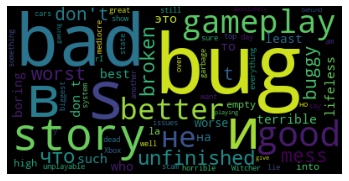

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
text = CP2077_reviews['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

Wordcloud des reviews généraux , les problèmes techniques sont plus mis en avant avec les mots : bug , bad , gameplay , broken , buggy etc ...

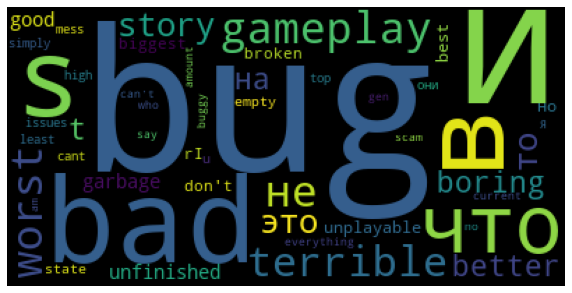

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
verybad = CP2077_reviews[CP2077_reviews['rating'] == '0']
text = verybad['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 50).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

Wordcloud des Reviews Négatifs

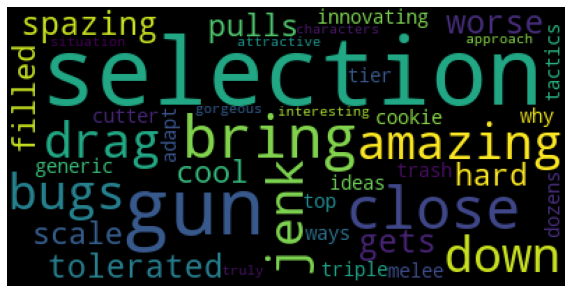

In [ ]:
exclure_mots = ['it','in','then','who''could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
good = CP2077_reviews[CP2077_reviews['rating'] > '7']
text = good['review'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 40).generate(str(text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

Wordcloud des avis très positifs : Amazing , innovating , approach , interesting ...

#Préparation jeu de donnée pour webscraping

In [ ]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
#Remplacement par le nom des plateformes
df_modif = df.replace(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], 
       ['wii', 'nes', 'gb', 'ds', 'xbox-360', 'playstation-3', 'playstation-2', 'snes', 'game-boy-advance',
        '3ds', 'playstation-4', 'n64', 'playstation', 'xbox', 'pc', '2600', 'psp', 'xbox-one', 'gamecube',
        'wii-u', 'gen', 'dreamcast', 'playstation-vita', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx'])

display(df_modif)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,game-boy-advance,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,gamecube,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,playstation-2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [ ]:
#Transformation des varibles Nom et Plateforme en liste
name = []
for i in df_modif['Name']:
  oi = i.lower()
  oi = oi.replace(':','')
  oi = oi.replace('&','')
  oi = oi.replace('-','')
  oi = oi.replace('.','')
  oi = oi.replace('(','')
  oi = oi.replace(')','')
  oi = oi.replace('!','')
  oi = oi.replace(' ','-')
  name.append(oi)

print(name[0])
console = []
for j in df_modif['Platform']:
  console.append(j)

print(console[0])

wii-sports
wii


In [ ]:
#Contrôle que les 2 listes soient de la même longueur
print(len(console))
print(len(name))

16171
16171


In [ ]:
#Stocker les 5000 premiers éléments de la liste console et name pour effectuer un test
from tqdm import tqdm
console1 = console[0:5000]
name1 = name[0:5000]
for i, j in tqdm(zip(console1, name1)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j

5000it [00:00, 678492.35it/s]


#Webscraping des informations suivantes : Critic_score, Critic_count, User_score, User_count, Developper, Multijoueurs.

In [ ]:
#Webscrapping de toutes les lignes
from tqdm import tqdm
review_dict = {'Critic_Score':[], 'Critic_Count':[], 'User_Score':[], 'User_Count':[], 'Developper':[], 'Multijoueur':[]}
for i, j in tqdm(zip(console1, name1)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  user_agent = {'User-agent': 'Chrome/6.0.472.63'}
  response  = requests.get(url, headers = user_agent)
  time.sleep(rand.randint(1,3))
  soup = BeautifulSoup(response.text, 'html.parser')
  try:
    review_dict['Critic_Score'].append(soup.find('span', itemprop="ratingValue").text)
  except:
    review_dict['Critic_Score'].append("NA")
  try:
    review_dict['Critic_Count'].append(str.strip(soup.find('span', class_="count").findAll('span')[2].text))
  except:
    review_dict['Critic_Count'].append("NA")
  try:
    review_dict['User_Score'].append(soup.find('div', class_="metascore_w user large game mixed").text)
  except:
    review_dict['User_Score'].append("NA")
  try:
    review_dict['User_Count'].append(soup.find('strong').text)
  except:
    review_dict['User_Count'].append("NA")
  try:
    review_dict['Developper'].append(soup.find('a', class_="button").text)
  except:
    review_dict['Developper'].append("NA")
  try:
    review_dict['Multijoueur'].append(soup.find('li', class_="summary_detail product_players").find('span', class_="data").text)
  except:
    review_dict['Multijoueur'].append("NA")    

Data_1 = pd.DataFrame(review_dict)
pd.DataFrame(Data_1).to_csv('Data_critics_1.csv')
Data_1

In [ ]:
#Stocker les 5000 à 10000 éléments de la liste console et name pour effectuer un test
console2 = console[5000:10000]
name2 = name[5000:10000]
for i, j in tqdm(zip(console2, name2)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j

In [ ]:
#Webscrapping de toutes les lignes
from tqdm import tqdm
review_dict = {'Critic_Score':[], 'Critic_Count':[], 'User_Score':[], 'User_Count':[], 'Developper':[], 'Multijoueur':[]}
for i, j in tqdm(zip(console2, name2)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  user_agent = {'User-agent': 'Chrome/6.0.472.63'}
  response  = requests.get(url, headers = user_agent)
  time.sleep(rand.randint(1,3))
  soup = BeautifulSoup(response.text, 'html.parser')
  try:
    review_dict['Critic_Score'].append(soup.find('span', itemprop="ratingValue").text)
  except:
    review_dict['Critic_Score'].append("NA")
  try:
    review_dict['Critic_Count'].append(str.strip(soup.find('span', class_="count").findAll('span')[2].text))
  except:
    review_dict['Critic_Count'].append("NA")
  try:
    review_dict['User_Score'].append(soup.find('div', class_="metascore_w user large game mixed").text)
  except:
    review_dict['User_Score'].append("NA")
  try:
    review_dict['User_Count'].append(soup.find('strong').text)
  except:
    review_dict['User_Count'].append("NA")
  try:
    review_dict['Developper'].append(soup.find('a', class_="button").text)
  except:
    review_dict['Developper'].append("NA")
  try:
    review_dict['Multijoueur'].append(soup.find('li', class_="summary_detail product_players").find('span', class_="data").text)
  except:
    review_dict['Multijoueur'].append("NA")    

Data_2 = pd.DataFrame(review_dict)
pd.DataFrame(Data_2).to_csv('Data_critics_2.csv')
Data_2

In [ ]:
#Stocker les 10000 à 15000 éléments de la liste console et name pour effectuer un test
console3 = console[10000:15000]
name3 = name[10000:15000]
for i, j in tqdm(zip(console3, name3)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j

In [ ]:
#Webscrapping de toutes les lignes
from tqdm import tqdm
review_dict = {'Critic_Score':[], 'Critic_Count':[], 'User_Score':[], 'User_Count':[], 'Developper':[], 'Multijoueur':[]}
for i, j in tqdm(zip(console3, name3)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  user_agent = {'User-agent': 'Chrome/6.0.472.63'}
  response  = requests.get(url, headers = user_agent)
  time.sleep(rand.randint(1,3))
  soup = BeautifulSoup(response.text, 'html.parser')
  try:
    review_dict['Critic_Score'].append(soup.find('span', itemprop="ratingValue").text)
  except:
    review_dict['Critic_Score'].append("NA")
  try:
    review_dict['Critic_Count'].append(str.strip(soup.find('span', class_="count").findAll('span')[2].text))
  except:
    review_dict['Critic_Count'].append("NA")
  try:
    review_dict['User_Score'].append(soup.find('div', class_="metascore_w user large game mixed").text)
  except:
    review_dict['User_Score'].append("NA")
  try:
    review_dict['User_Count'].append(soup.find('strong').text)
  except:
    review_dict['User_Count'].append("NA")
  try:
    review_dict['Developper'].append(soup.find('a', class_="button").text)
  except:
    review_dict['Developper'].append("NA")
  try:
    review_dict['Multijoueur'].append(soup.find('li', class_="summary_detail product_players").find('span', class_="data").text)
  except:
    review_dict['Multijoueur'].append("NA")    

Data_3 = pd.DataFrame(review_dict)
pd.DataFrame(Data_3).to_csv('Data_critics_3.csv')
Data_3

In [ ]:
#Stocker les 15000 à 16171 éléments de la liste console et name pour effectuer un test
console4 = console[15000:16171]
name4 = name[15000:16171]
for i, j in tqdm(zip(console4, name4)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j

In [ ]:
#Webscrapping de toutes les lignes
from tqdm import tqdm
review_dict = {'Critic_Score':[], 'Critic_Count':[], 'User_Score':[], 'User_Count':[], 'Developper':[], 'Multijoueur':[]}
for i, j in tqdm(zip(console4, name4)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  user_agent = {'User-agent': 'Chrome/6.0.472.63'}
  response  = requests.get(url, headers = user_agent)
  time.sleep(rand.randint(1,3))
  soup = BeautifulSoup(response.text, 'html.parser')
  try:
    review_dict['Critic_Score'].append(soup.find('span', itemprop="ratingValue").text)
  except:
    review_dict['Critic_Score'].append("NA")
  try:
    review_dict['Critic_Count'].append(str.strip(soup.find('span', class_="count").findAll('span')[2].text))
  except:
    review_dict['Critic_Count'].append("NA")
  try:
    review_dict['User_Score'].append(soup.find('div', class_="metascore_w user large game mixed").text)
  except:
    review_dict['User_Score'].append("NA")
  try:
    review_dict['User_Count'].append(soup.find('strong').text)
  except:
    review_dict['User_Count'].append("NA")
  try:
    review_dict['Developper'].append(soup.find('a', class_="button").text)
  except:
    review_dict['Developper'].append("NA")
  try:
    review_dict['Multijoueur'].append(soup.find('li', class_="summary_detail product_players").find('span', class_="data").text)
  except:
    review_dict['Multijoueur'].append("NA")    

Data_4 = pd.DataFrame(review_dict)
pd.DataFrame(Data_4).to_csv('Data_critics_4.csv')
Data_4

#Fusion des jeu de donnée webscrapés Critics_score, etc... avec le jeu de donné original

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_1 = pd.read_csv(io.BytesIO(uploaded['Data_critics_1.csv']), sep = ',', index_col = 0)
display(df_1)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_2 = pd.read_csv(io.BytesIO(uploaded['Data_critics_2.csv']), sep = ',', index_col = 0)
display(df_2)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_3 = pd.read_csv(io.BytesIO(uploaded['Data_critics_3.csv']), sep = ',', index_col = 0)
display(df_3)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_4 = pd.read_csv(io.BytesIO(uploaded['Data_critics_4.csv']), sep = ',', index_col = 0)
display(df_4)

In [ ]:
frames = (df_1, df_2,df_3 , df_4)
df_critics = pd.concat(frames)
display(df_critics)

In [ ]:
df_critics = df_critics.reset_index()
df_critics = df_critics.drop('index', axis=1)
pd.DataFrame(df_critics).to_csv('df_critics.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
pd.read_csv(io.BytesIO(uploaded['df_critics.csv']), sep = ',', index_col = 0)

In [ ]:
#Fusion finale avec jeu de donné original
df = df.reset_index()
df = df.drop('Rank', axis=1)
df_prefinal = df.join(df_critics, how='outer')
pd.DataFrame(df_prefinal).to_csv('df_prefinal.csv')

In [ ]:
#Remplacement par le nom des plateformes
df_prefinal = df_prefinal.replace(['No Online Multiplayer', '1 Player', '1-2 ', '1-4 ', 'Up to 4 ', '2  Online', '2 ', 'Up to 8 ', '4  Online',
       '1-8 ', 'Up to 12 ', 'Up to 16 ', '8  Online', 'Up to 6 ', 'Up to 10 ', '16  Online', '6  Online', 'Massively Multiplayer', 'Online Multiplayer',
       'Up to 18 ', '1-6 ', '1-16 ', 'Up to 22 ', 'Up to 24 ', '10  Online', '32  Online', '1-3 ', '1-5 ',
       'Up to 32 ', '24  Online', '1-12 ', '12  Online', '1-10 ', 'Up to 20 ', 'Up to 3 ', 'Up to 5 ', 
       'Up to 14 ', 'Up to 64 ', 'Up to more than 64 ', 'Up to 30 ', '1-32 ', '64  Online', '3  Online',
       'Up to 40 ', 'Up to 9 ', '44  Online', '14  Online', 'Up to 60 ', '64+ ', '1-64 ', '64+  Online', '5  Online',
       'Friend System Only', '2', 'Up to 8'], 
       ['Up to 1', '1 Player', 'Up to 1', 'Up to 1', 'Online', 'Online', 'Up to 1', 'Online', 'Online',
       'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online',
       'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online',
       'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 
       'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online',
       'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online',
       'Up to 1', 'Up to 1', 'Online'])

In [ ]:
#Etape de preprocessing pour él
df_prefinal['User_Count'].astype(object)
df_prefinal['User_Counts'] = df_prefinal['User_Count'].str.split(' ', n=2, expand=True)[0]
df_prefinal.drop('User_Count', axis=1, inplace=True)
df_prefinal['User_Counts'] = df_prefinal['User_Counts'].astype(float)

In [ ]:
df_prefinal.info()

In [ ]:
data_pair = df_prefinal4.loc[:,["Genre","Critic_Score", "NA_Sales","EU_Sales","JP_Sales", "Other_Sales"]]
display(data_pair)
sns.pairplot(data_pair, hue='Genre')
plt.savefig("Critic_sales.png")
plt.show()

In [ ]:
import pandas as pd
df_prefinal = df_prefinal[['Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales',
                             'Critic_Score','Critic_Count','User_Score','User_Counts','Developper','Multijoueur']]

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_prefinal.corr(), annot=True, cmap='RdBu_r', center=0)
display()
df_prefinal.corr()

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Multijoueur", data=df_prefinal, order = df_prefinal['Multijoueur'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Proportion des Genres selon les jeux videos');

In [ ]:
data_multi = df_prefinal.groupby(by=['Multijoueur'])['Global_Sales'].sum()
data_multi = data_multi.reset_index()
data_multi = data_multi.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Multijoueur", y="Global_Sales", data=data_multi)
plt.xticks(rotation=90)
plt.title('Les Genres en tête des ventes');

In [ ]:
date_multi2 = df_prefinal4[(df_prefinal4['Multijoueur'] == 'Up to 1') | (df_prefinal4['Multijoueur'] == '1 Player') | (df_prefinal4['Multijoueur'] == 'Online')]
yearlySales = date_multi2.groupby(['Year','Multijoueur']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Accent',  
                           grid=False,  figsize=(13,11))
plt.title('Evolution des ventes des jeux en ligne')
plt.ylabel('Global Sales')
plt.savefig("Genre_time2.png")
plt.show()

In [ ]:
comp_dev = df_prefinal4[['Developper', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_dev = comp_dev.groupby(by=['Developper']).sum().reset_index()
comp_dev = comp_dev.sort_values(by='Global_Sales', ascending=False).iloc[0:20]

In [ ]:
comp_dev.plot(
    x = 'Developper',
    kind = 'barh',
    stacked = True,
    color = ['firebrick','cornflowerblue','limegreen','darkslategrey'],
    title = 'Vente des développeurs en fonctions des régions',
    mark_right = True,
    figsize=(13,13))
plt.savefig("Platform.png")
plt.show()

In [ ]:
dev_genre2 = dev_genre[(dev_genre['Developper'] == 'Nintendo') | (dev_genre['Developper'] == 'Electronic Arts') | (dev_genre['Developper'] == 'Ubisoft') | (dev_genre['Developper'] == 'Rockstar North')
 | (dev_genre['Developper'] == 'Capcom')]
plt.figure(figsize=(15, 10))
sns.countplot(x='Genre', hue='Developper', data=dev_genre2)
plt.title("Nombre de jeux développés en fonction des genres les plus populaires")
plt.savefig("Dev.png")
plt.show()


# Text-Mining avec : Rating , Awards , Description


In [ ]:

ok = console[0:16598]
po = name[0:16598]
for i, j in tqdm(zip(ok, po)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  print(url)

In [ ]:
url = "https://www.metacritic.com/game/wii/wii-sports"
user_agent = {'User-agent': 'Chrome/6.0.472.63'}
response  = requests.get(url, headers = user_agent)
time.sleep(rand.randint(1,3))
soup = BeautifulSoup(response.text, 'html.parser')
soup

In [ ]:
soup2 = soup.find('li', class_="summary_detail product_rating")
soup2.find('span', class_="data").text

soup3 = soup.find('div', class_="ranking_title")
soup3.find('a').text

In [ ]:
soupt = soup.find('div', class_="product_title")
soupt.find('h1').text

In [ ]:
review_dict = {'Title':[],'Rating':[], 'Award':[], 'Desc':[]}
for i, j in tqdm(zip(ok, po)):
  url = 'https://www.metacritic.com/game/'+i+'/'+j
  user_agent = {'User-agent': 'Chrome/6.0.472.63'}
  response  = requests.get(url, headers = user_agent)
  time.sleep(rand.randint(1,3))
  soup = BeautifulSoup(response.text, 'html.parser')
  try:
    soupt = soup.find('div', class_="product_title")
    review_dict['Title'].append(soupt.find('h1').text)
  except:
    review_dict['Title'].append("NA")

  try:
    
    soup2 = soup.find('li', class_="summary_detail product_rating")
    review_dict['Rating'].append(soup2.find('span', class_="data").text)
  except:
    review_dict['Rating'].append("NA")

  try:
    
    soup3 = soup.find('div', class_="ranking_title")
    review_dict['Award'].append(soup3.find('a').text)
  except:
    review_dict['Award'].append("NA")

  try:
    review_dict['Desc'].append(soup.find('span', class_="blurb blurb_expanded").text)
  except:
    review_dict['Desc'].append("NA")
  

dataframe = pd.DataFrame(review_dict)
dataframe

In [ ]:
from google.colab import files
#on upload RatingAwardDescription.csv , tout à déja été fusionné .
uploaded = files.upload()

In [ ]:
desc = pd.read_csv(io.BytesIO(uploaded['RatingAwardDescription.csv']), index_col=0, sep = ',')
desc = desc.replace({'E': 3,'K-A': 3, 'E10+': 12, 'T': 16, 'M': 18, 'AO': 18 })
desc

on remplace le Rating ESRB par le PEGI

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
sns.countplot( x="Rating", data=desc, order = desc['Rating'].value_counts().index)
plt.show()

Première visualisation du Rating . les jeux tout publics dominent .

In [ ]:

topbest = desc[desc["Award"].str.contains('Best','Game')]
topbest

topbest = les jeux ayant eu une nomination best game uniquement 

In [ ]:
bshooter = topbest.loc[topbest['Genre'] == 'Shooter'] 
bRPG = topbest.loc[topbest['Genre'] == 'Role-Playing']
bAction = topbest.loc[topbest['Genre'] == 'Action']

In [ ]:
mostdiscussed = desc[desc["Award"].str.contains('Discussed')]
mostdiscussed

mostdiscussed = les jeux les plus discutés uniquement .

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
exclure_mots = ['well','it','in','then','who','take','Star','Wars','could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
text = mdAction['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

text = bAction['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

comparaison d'un WordCloud de la description des meilleurs jeux d'action contre ceux des jeux d'action les plus discutés . les mots retrouvés sont différents .

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
exclure_mots = ['well','it','in','then','who','take','Star','Wars','could', 'if', 'the', 'is', 'le', 'this', 'that', 'there', 'no', 'we', 'us', 'most', 'of', 'a', 'what', 'to','they', 'not', 'year', 'even', 'was', 'all', 'with', 'like', 'get', 'at', 'look', 'just', 'your', 'from', 'as', 'than', 'more', 'an', 'have', 'do', 'how', 'really', 'on','game','juego','lo','too','una','are','so','much','can','graphic','NPC','play','but', 'open world','review','would','people','same','will','for','one','or','should','AI','open','months','feel','my','first','time','GTA','games','any','years','money','world','setting','thing','did','fix','when','after', 'by','make','settings','put','buy','because','yet','only','issue', 'be','ever','video','product','has','played','its','work','been','out','Ha','he','many','about','level','release','marketing','very','think','me','actually','B','you','optimization','He','reviews','had','dont','hours','driving','I','and','see','pc','character', 'console', 'full','car','never','performance','mission','their','NPCs','development','where','feels','run','then','every','released','up','lot','Cyberpunk','RPG','graphics','could','de','far','things','looks','other','fps','without','city','version','now','missions','CDPR','r','also','need','them','que','know','some','glitches','nothing','ps4','were']
text = pegi3['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();


text = pegi12['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

text = pegi16['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

text = pegi18['Desc'].values 
wordcloud = WordCloud(background_color = 'black', stopwords = exclure_mots, max_words = 70).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

Comparaison d'un WordCloud entre les différents PEGI . les récurrences changent d'une classification a un autre on peut rapidement voir que les jeux de sports visent le tout public et le public adulte vise les jeux d'action .